In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [12]:
def mfft(x):
    N = len(x)
    if N == 1:
        return x
    else:
        xe = mfft(x[::2])
        xo = mfft(x[1::2])
        factor = np.exp(-2.0j * np.pi * np.arange(N) / N)
        x = np.concatenate([xe + factor[:int(N/2.0)]*xo,
                            xe + factor[int(N/2.0):]*xo])
        return x

In [13]:
sr = 4096
dt = 1.0 / sr

Fs = [10.0, 20.0, 30.0, 45.0]
t = np.arange(0.0, 2.0, dt)

L = 101  # int(len(t)/2.0)

fc = sum(np.sin(2.0 * np.pi * f * t) for f in Fs)
fn = fc + 5.0 * np.random.randn(len(t))

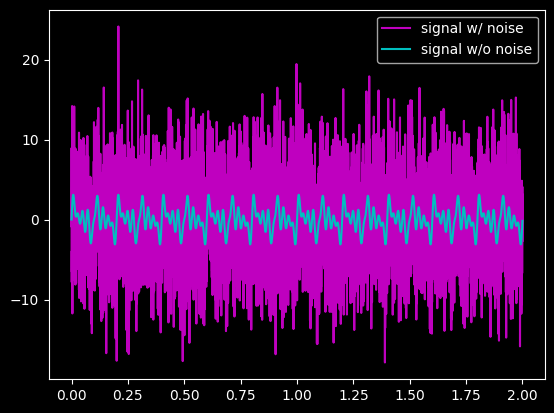

In [14]:
plt.plot(t, fn, color="m", label="signal w/ noise")
plt.plot(t, fc, color="c", label="signal w/o noise")
plt.legend()

In [15]:
fhat = np.fft.fft(fn, len(t))
psd = np.real(fhat * np.conj(fhat)) / len(t)
freq = (1 / (dt*len(t))) * np.arange(len(t))

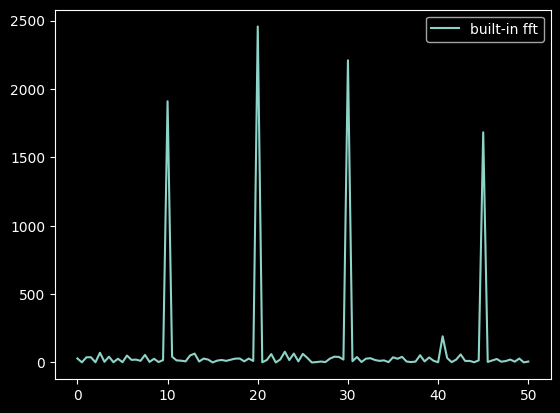

In [16]:
plt.plot(freq[0:L], psd[0:L], label="built-in fft")
plt.legend()

In [17]:
mfhat = mfft(fn)
mpsd = np.real(mfhat * np.conj(mfhat)) / len(t)

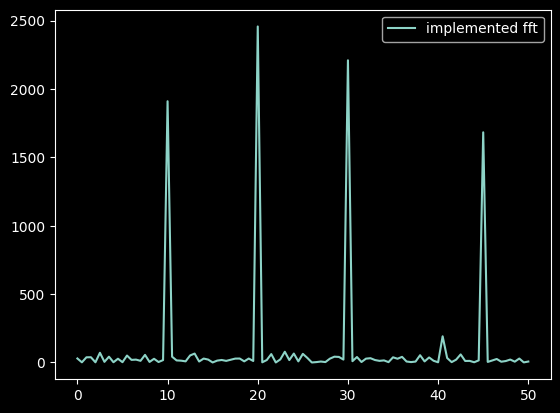

In [18]:
plt.plot(freq[0:L], mpsd[0:L], label="implemented fft")
plt.legend()

In [19]:
fval = np.max(mpsd)
mpsdf = [1 if np.abs(v) > fval/2.0 else 0 for v in psd]

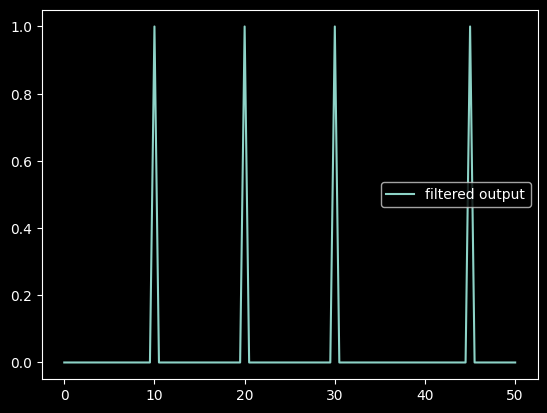

In [20]:
plt.plot(freq[:L], mpsdf[:L], label="filtered output")
plt.legend()